All imports

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import redshift_connector
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [44]:

# Specify the directory path where you want to save the CSV file
directory = 'MinMaxScaler_With_HyperParameters'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

Connect to DB and fetch data

In [45]:
conn = redshift_connector.connect(
    host='abcd',
    port=5439,
    database='abcd',
    user='abcd',
    password='abcd'
)
cursor = conn.cursor()
df_main = pd.DataFrame()

de_fields = "de.serial_number,de.part_number,de.operation,de.test_date"
lp_fields = "lp.field_name,lp.field_value,lp.time_pulled,lp.instance"
model_values = "'WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WDC-WUS4EB016D7P3E3',"\
               "'WUS4CB080D7P3E3','WUS4CB016D7P3E3','WUS4CB032D7P3E3','WUS4CB064D7P3E3','WUS4BB096D7P3E1','WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4BB076D7P3E1','WUS4BB096D7P3E3',"\
               "'WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4CB032D7P3E3','WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4CB080D7P3E3','WUS4CB016D7P3E3',"\
               "'WUS4CB032D7P3E3','WUS4CB064D7P3E3','WDC-WDS192T1D0D-01AJB0','WDC-WDS192T1DVD-02AJC0'',''WDC-WDS384T1D0D-01AJB0','WDC-WDS384T1DVD-02AJC0','WDC-WDS768T1D0D-01AJB0',"\
               "'WDC-WDS768T1DVD-02AJC0','WDC-WDS960G1D0D-01AJB0','WDC-WDS960G1DVD-02AJC0','WUS4BB076D7P3E3','WUS4CB080D7P3E3','WUS4CB016D7P3E3','WUS4BB096D7P3E3','WUS4BB038D7P3E3',"\
               "'WUS4CB032D7P3E3','WUS4CB064D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4CB032D7P3E3','WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4BB076D7P3E1',"\
               "'WUS4BB076D7P3E3','WUS4BB096D4M9E3','WUS4BB019D4M9E3','WUS4BB038D4M9E3','WUS4BB096D4M9E3','WUS4BB019D4M9E3','WUS4BB038D4M9E3','WUS4CB080D7P3E3','WUS4BB019D7P3E3',"\
               "'WUS4BB038D7P3E3','WUS4CB064D7P3E3','WUS4AB076D9ELE3','WUS4AB0A1D9ELE3','WUS4AB0A1DAELE7','WUS4AB076D9ELE7','WUS4AB0A1D9ELE8','WUS4BB096D7P3E4','WUS4BB019D7P3E4',"\
               "'WUS4BB038D7P3E4','WUS4BB076D7P3E4','WUS4CB080D7P3E4','WUS4CB016D7P3E4','WUS4CB032D7P3E4','WUS4CB064D7P3E4','WUS4BB096D7P3E4','WUS4BB019D7P3E4','WUS4BB076D7P3E4',"\
               "'WUS4BB096D4MBE6','WUS4BB019D4MBE6','WUS4BB038D4MBE6','WUS4BB038D4M9E7','WUS4BB019D4M9E7','WUS4BB019DJESE7','WUS4BB038DJESE7',"\
               "'0TS1927','0TS1928','0TS1929','0TS1930','0TS1992','0TS1993','0TS1994','0TS1995','0TS2226','0TS1952','0TS1953','0TS1954','0TS1955','0TS1960','0TS1961','0TS1962','0TS1963',"\
               "'0TS2162','0TS2163','0TS2164','0TS2165','0TS2184','0TS2185','0TS2186','0TS2187','0TS2188','0TS2189','0TS2190','0TS2191',"\
               "'WDS192T1D0D-01AJB0','WDS192T1DVD-02AJC0','WDS384T1D0D-01AJB0','WDS384T1DVD-02AJC0','WDS768T1D0D-01AJB0','WDS768T1DVD-02AJC0','WDS960G1D0D-01AJB0','WDS960G1DVD-02AJC0',"\
               "'0TS2346','0TS2350','0TS2351','0TS2347','0TS2348','0TS2379','0TS2380','0TS1928','0TS1929','0TS1930','0TS1954','0TS2389','0TS2390','0TS2391','0TS2414','0TS1861','0TS1862',"\
               "'0TS1863','0TS1996','0TS1997','0TS1998','0TS2086','0TS2087','0TS2088','0TS2089','0TS2122','0TS2123','0TS2003','0TS2125','0TS2126','0TS1849','0TS1850','0TS1851','0TS1852',"\
               "'0TS1854','0TS1855','0TS1856','0TS1857','0TS2110','0TS2111','0TS2349','0TS2231','0TS2232','0TS2233','0TS2381','0TS2000','0TS2229','0TS2230'"
field_names = "'power_on_hours','recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail','recycled_sb_due_to_read_disturb_no_adit_when_only_WL_tierjoint_written', 'recycled_sb_due_to_reclamaton', 'host_cache_write_reovered_count', 'log_read_recovered_cunt', 'read_ecovery_fm0_sl1_ch3', 'read_recovery_page_count_3rd_hihest', 'read_recovery_success_cunt_recipe_01_bes_hard_read_program_suspend', 'read_recovery_ttal_retry_attempt_count_Last_8GB', 'no_of_dies_with_grown_defcts', 'war_log_entries_count', 'p1_smart_afe_shutdowns'"
for i in range(1,30):
  print(f"iteration: {i}")
  query = (f"SELECT {de_fields},{lp_fields} "
          f"FROM ssd_testlog2.drive_event de "
          f"JOIN ssd_testlog2.ua_logpage0x3e_archive lp "
          f"ON de.serial_number = lp.serial_number AND de.test_date = lp.test_date "
          f"WHERE de.test_date BETWEEN '2021-05-0{i} 00:00:00' AND '2021-05-0{i} 23:59:59' "
            f"AND de.part_number IN ({model_values}) "
            f"AND lp.field_name IN ({field_names}) "
            f"AND de.operation = 'SMST' ")
  cursor.execute(query)
  df_main_temp:pd.DataFrame = cursor.fetch_dataframe()
  df_main = pd.concat([df_main, df_main_temp])
df_main.shape
cursor = conn.cursor()
cursor.close()
conn.close()

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29


Pivot the table so that each field name becomes a column, grouped by the serial_number,test_date,instance

In [46]:
df_main_pivot = df_main.pivot_table(index=['serial_number','part_number','operation','test_date','instance'], columns='field_name', values='field_value', aggfunc='first', fill_value=0)
file_path = os.path.join(directory, 'df_main_pivot.csv')
df_main_pivot.to_csv(file_path)
df_main_pivot.shape

(2207131, 69)

Move the power_on_hours column to the beginning of the field name columns

In [47]:
columns = df_main_pivot.columns.tolist()
columns.insert(0,columns.pop(columns.index('power_on_hours')))
df_data = df_main_pivot.reindex(columns=columns)


In [48]:
df_data = df_data.sort_values(by=['test_date','serial_number'])
df_data.shape

(2207131, 69)

Flatten the column structure and reindex to simplify view of columns

In [49]:
df_data.reset_index(inplace=True)
df_data.columns.name = None
df_data.shape

(2207131, 74)

In [50]:
idx = df_data.groupby(['serial_number', 'part_number', 'operation', 'test_date'])['power_on_hours'].idxmax()
df_data_with_max_poh = df_data.loc[idx]
df_data_with_max_poh.index = df_data_with_max_poh.index.to_flat_index()
df_data_with_max_poh = df_data_with_max_poh.reset_index(drop=True)

file_path = os.path.join(directory, 'df_data_with_max_poh.csv')
df_data_with_max_poh.to_csv(file_path)


In [51]:
df_data_with_max_poh


,serial_number,part_number,operation,test_date,instance,power_on_hours,a2f_op_read_recovery_count,case_composite_temperature,drive_average_ber,drive_life_remaining,...,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,recycled_sb_that_were_open_and_had_DI,recycled_sb_that_were_open_subset_that_received_pre_program_erase,recycled_sb_that_were_open_when_recycled,smart_warning_composite_temperature_time,upper_page_average_ber,zq_calibration_issued_to_die_count
0,21072A900032,0TS2000,SMST,2021-05-28 18:14:03,80100,28,0,59,95,99,...,0,0,0,0,1240,4617,660,0,62,7744
1,21072A900035,0TS2000,SMST,2021-05-28 18:14:09,80100,28,0,52,109,99,...,0,0,0,0,1922,6306,1065,0,74,10944
2,21072A900036,0TS2000,SMST,2021-05-28 18:13:22,80100,28,0,52,95,99,...,0,0,0,0,1213,4792,649,0,63,7680
3,21072A900039,0TS2000,SMST,2021-05-28 18:14:30,5030,29,0,51,160,99,...,0,0,0,0,555,2916,273,0,74,3840
4,21072A900041,0TS2000,SMST,2021-05-28 18:13:12,80100,28,0,56,106,99,...,0,0,0,0,1334,5014,765,0,72,7808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106496,A0720718,0TS1995,SMST,2021-05-29 19:44:54,303082,8,0,58,165,99,...,0,0,0,0,658,8771,278,0,74,640
106497,A0720728,0TS1995,SMST,2021-05-29 19:45:49,303082,8,0,57,153,99,...,0,0,0,0,614,8730,246,0,74,640
106498,A072073F,0TS1995,SMST,2021-05-29 19:46:54,30311,7,0,60,164,99,...,0,0,0,0,470,8484,143,0,75,640
106499,A0720740,0TS1995,SMST,2021-05-29 19:47:28,30312,9,0,58,159,99,...,0,0,0,0,447,8459,118,0,77,640


Get nunique to show the number of unique values in each column

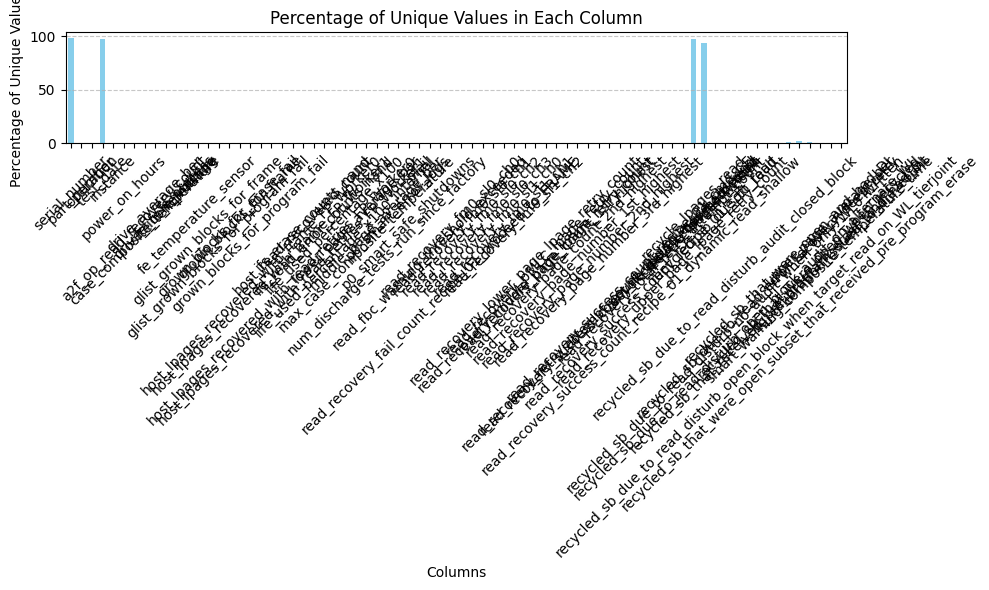

In [52]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
nunique.to_csv('data_uniqueness.csv')
nunique
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Drop columns with a single unique value

In [53]:
cols_to_drop = nunique[nunique == 1].index
df_result = df_data.drop(cols_to_drop, axis=1)
df_data_with_max_poh = df_data_with_max_poh.drop(cols_to_drop, axis=1)

file_path = os.path.join(directory, 'df_data_with_max_poh.csv')

df_data_with_max_poh.to_csv(file_path)

In [54]:
df_data_with_max_poh.shape

(106501, 73)

EDA

In [55]:
df_data_with_max_poh.describe()

,test_date,instance,power_on_hours,a2f_op_read_recovery_count,case_composite_temperature,drive_average_ber,drive_life_remaining,fe_core_voltage,fe_process,fe_temperature_sensor,...,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,recycled_sb_that_were_open_and_had_DI,recycled_sb_that_were_open_subset_that_received_pre_program_erase,recycled_sb_that_were_open_when_recycled,smart_warning_composite_temperature_time,upper_page_average_ber,zq_calibration_issued_to_die_count
count,106501,1.065010e+05,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,...,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000
mean,2021-05-15 18:25:42.582642176,1.786930e+05,9.029286,0.000526,58.410578,162.867147,99.020432,26.653261,2.604248,64.640210,...,0.054948,0.000019,0.023793,0.099079,583.552906,8418.109858,242.109483,0.228298,77.882583,1141.252307
min,2021-05-01 00:02:35,3.010000e+02,0.000000,0.000000,30.000000,0.000000,99.000000,0.000000,1.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-05-08 03:35:19,3.031200e+04,8.000000,0.000000,57.000000,147.000000,99.000000,0.000000,2.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,468.000000,8487.000000,144.000000,0.000000,73.000000,640.000000
50%,2021-05-15 15:19:15,3.030820e+05,8.000000,0.000000,57.000000,166.000000,99.000000,0.000000,3.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,619.000000,8734.000000,251.000000,0.000000,79.000000,640.000000
75%,2021-05-24 00:36:02,3.030820e+05,10.000000,0.000000,58.000000,185.000000,99.000000,0.000000,3.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,641.000000,8757.000000,272.000000,0.000000,85.000000,768.000000
max,2021-05-29 23:51:29,2.480100e+06,709.000000,1.000000,32767.000000,931.000000,100.000000,844.000000,3.000000,32767.000000,...,148.000000,1.000000,481.000000,1109.000000,4890.000000,22568.000000,3089.000000,68.000000,942.000000,41984.000000
std,NaN,1.344405e+05,5.171233,0.022925,200.481307,38.493411,0.141472,146.075993,0.595112,332.384555,...,0.708940,0.004333,2.351237,7.935138,260.483581,2446.287305,174.152420,2.925034,15.552861,2894.375135


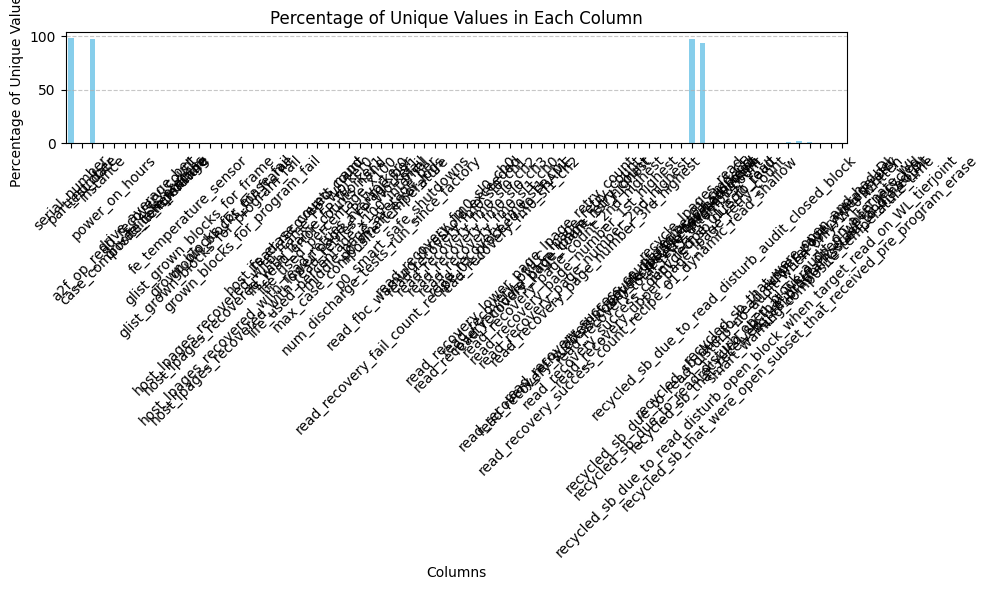

In [56]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
file_path = os.path.join(directory, 'data_uniqueness.csv')
nunique.to_csv(file_path)


file_path = os.path.join(directory, 'df_data_with_max_poh.csv')
df_data_with_max_poh.to_csv('df_data_with_max_poh.csv')

In [58]:
df_data_with_max_poh.shape

(106501, 73)

Limiting to columns listed on Confluence

In [59]:
with pd.option_context('display.float_format', lambda x: '%.2f' % x):
    df_data_with_max_poh_desc = df_data_with_max_poh[['recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']].describe()
    print (df_data_with_max_poh_desc)

       recycle_data_recovered_count  recycle_lpages_read  \
count                     106501.00            106501.00   
mean                          10.49        1963618906.90   
std                         1502.34        4570822353.95   
min                            0.00                 0.00   
25%                            0.00        1168003913.00   
50%                            0.00        1194603111.00   
75%                            0.00        1214414140.00   
max                       417680.00       30549122920.00   

       recycle_lpages_written  recycled_sb_due_to_fault  \
count               106501.00                 106501.00   
mean            1925159813.88                      0.04   
std             4572656586.94                      2.67   
min                      0.00                      0.00   
25%             1167357536.00                      0.00   
50%             1193660980.00                      0.00   
75%             1211763876.00                 

In [60]:
f_data = df_data_with_max_poh[['recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']]
file_path = os.path.join(directory, 'f_data.csv')
f_data.to_csv(file_path)
f_data.shape

(106501, 68)

In [61]:
f_data.describe()

,recycle_data_recovered_count,recycle_lpages_read,recycle_lpages_written,recycled_sb_due_to_fault,recycled_sb_due_to_read_disturb_audit_closed_block,recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,...,drive_life_remaining,fe_core_voltage,fe_process,fe_temperature_sensor,life_used_percentage_x100,life_used_percentage_x100_internal,p0_smart_safe_shutdowns,num_discharge_tests_run_since_factory,zq_calibration_issued_to_die_count,pfail
count,106501.000000,1.065010e+05,1.065010e+05,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,...,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000,106501.000000
mean,10.487019,1.963619e+09,1.925160e+09,0.036666,0.052347,186.672839,0.054948,0.000019,0.023793,0.099079,...,99.020432,26.653261,2.604248,64.640210,3.524587,3.692322,1.837804,45.842893,1141.252307,32.313593
std,1502.335162,4.570822e+09,4.572657e+09,2.668755,11.021806,44.482416,0.708940,0.004333,2.351237,7.935138,...,0.141472,146.075993,0.595112,332.384555,2.545752,2.745995,9.663227,40.490706,2894.375135,11.293446
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,1.000000,32.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.168004e+09,1.167358e+09,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,2.000000,61.000000,3.000000,3.000000,0.000000,30.000000,640.000000,22.000000
50%,0.000000,1.194603e+09,1.193661e+09,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,62.000000,3.000000,3.000000,0.000000,46.000000,640.000000,38.000000
75%,0.000000,1.214414e+09,1.211764e+09,0.000000,0.000000,212.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,62.000000,3.000000,3.000000,0.000000,46.000000,768.000000,38.000000
max,417680.000000,3.054912e+10,3.055153e+10,743.000000,3411.000000,686.000000,148.000000,1.000000,481.000000,1109.000000,...,100.000000,844.000000,3.000000,32767.000000,24.000000,67.000000,88.000000,905.000000,41984.000000,229.000000


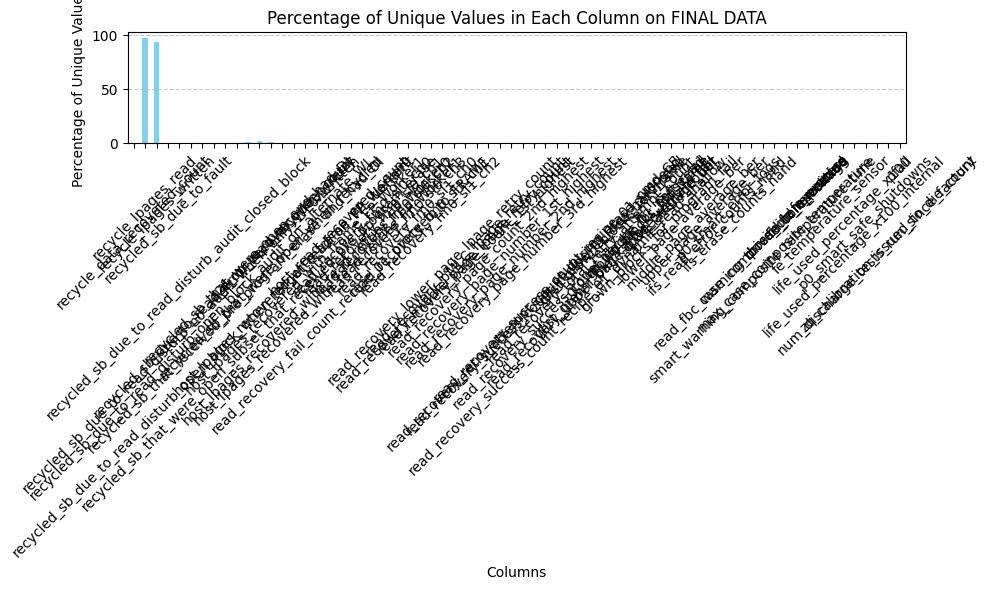

In [62]:
nuniquef_data = f_data.nunique()
nuniquef_data.columns=['column','uniquevalues']
unique_percentages = (f_data.nunique() / f_data.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column on FINAL DATA')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

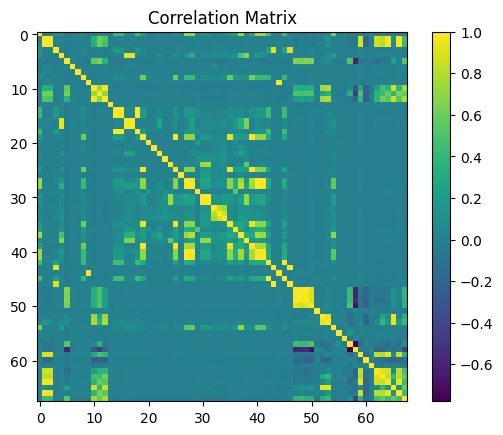

In [63]:
f_data_corr= f_data.corr()
plt.imshow(f_data_corr, cmap='viridis', interpolation='nearest')
plt.colorbar()  
plt.title('Correlation Matrix')
plt.show()

Correlation between features

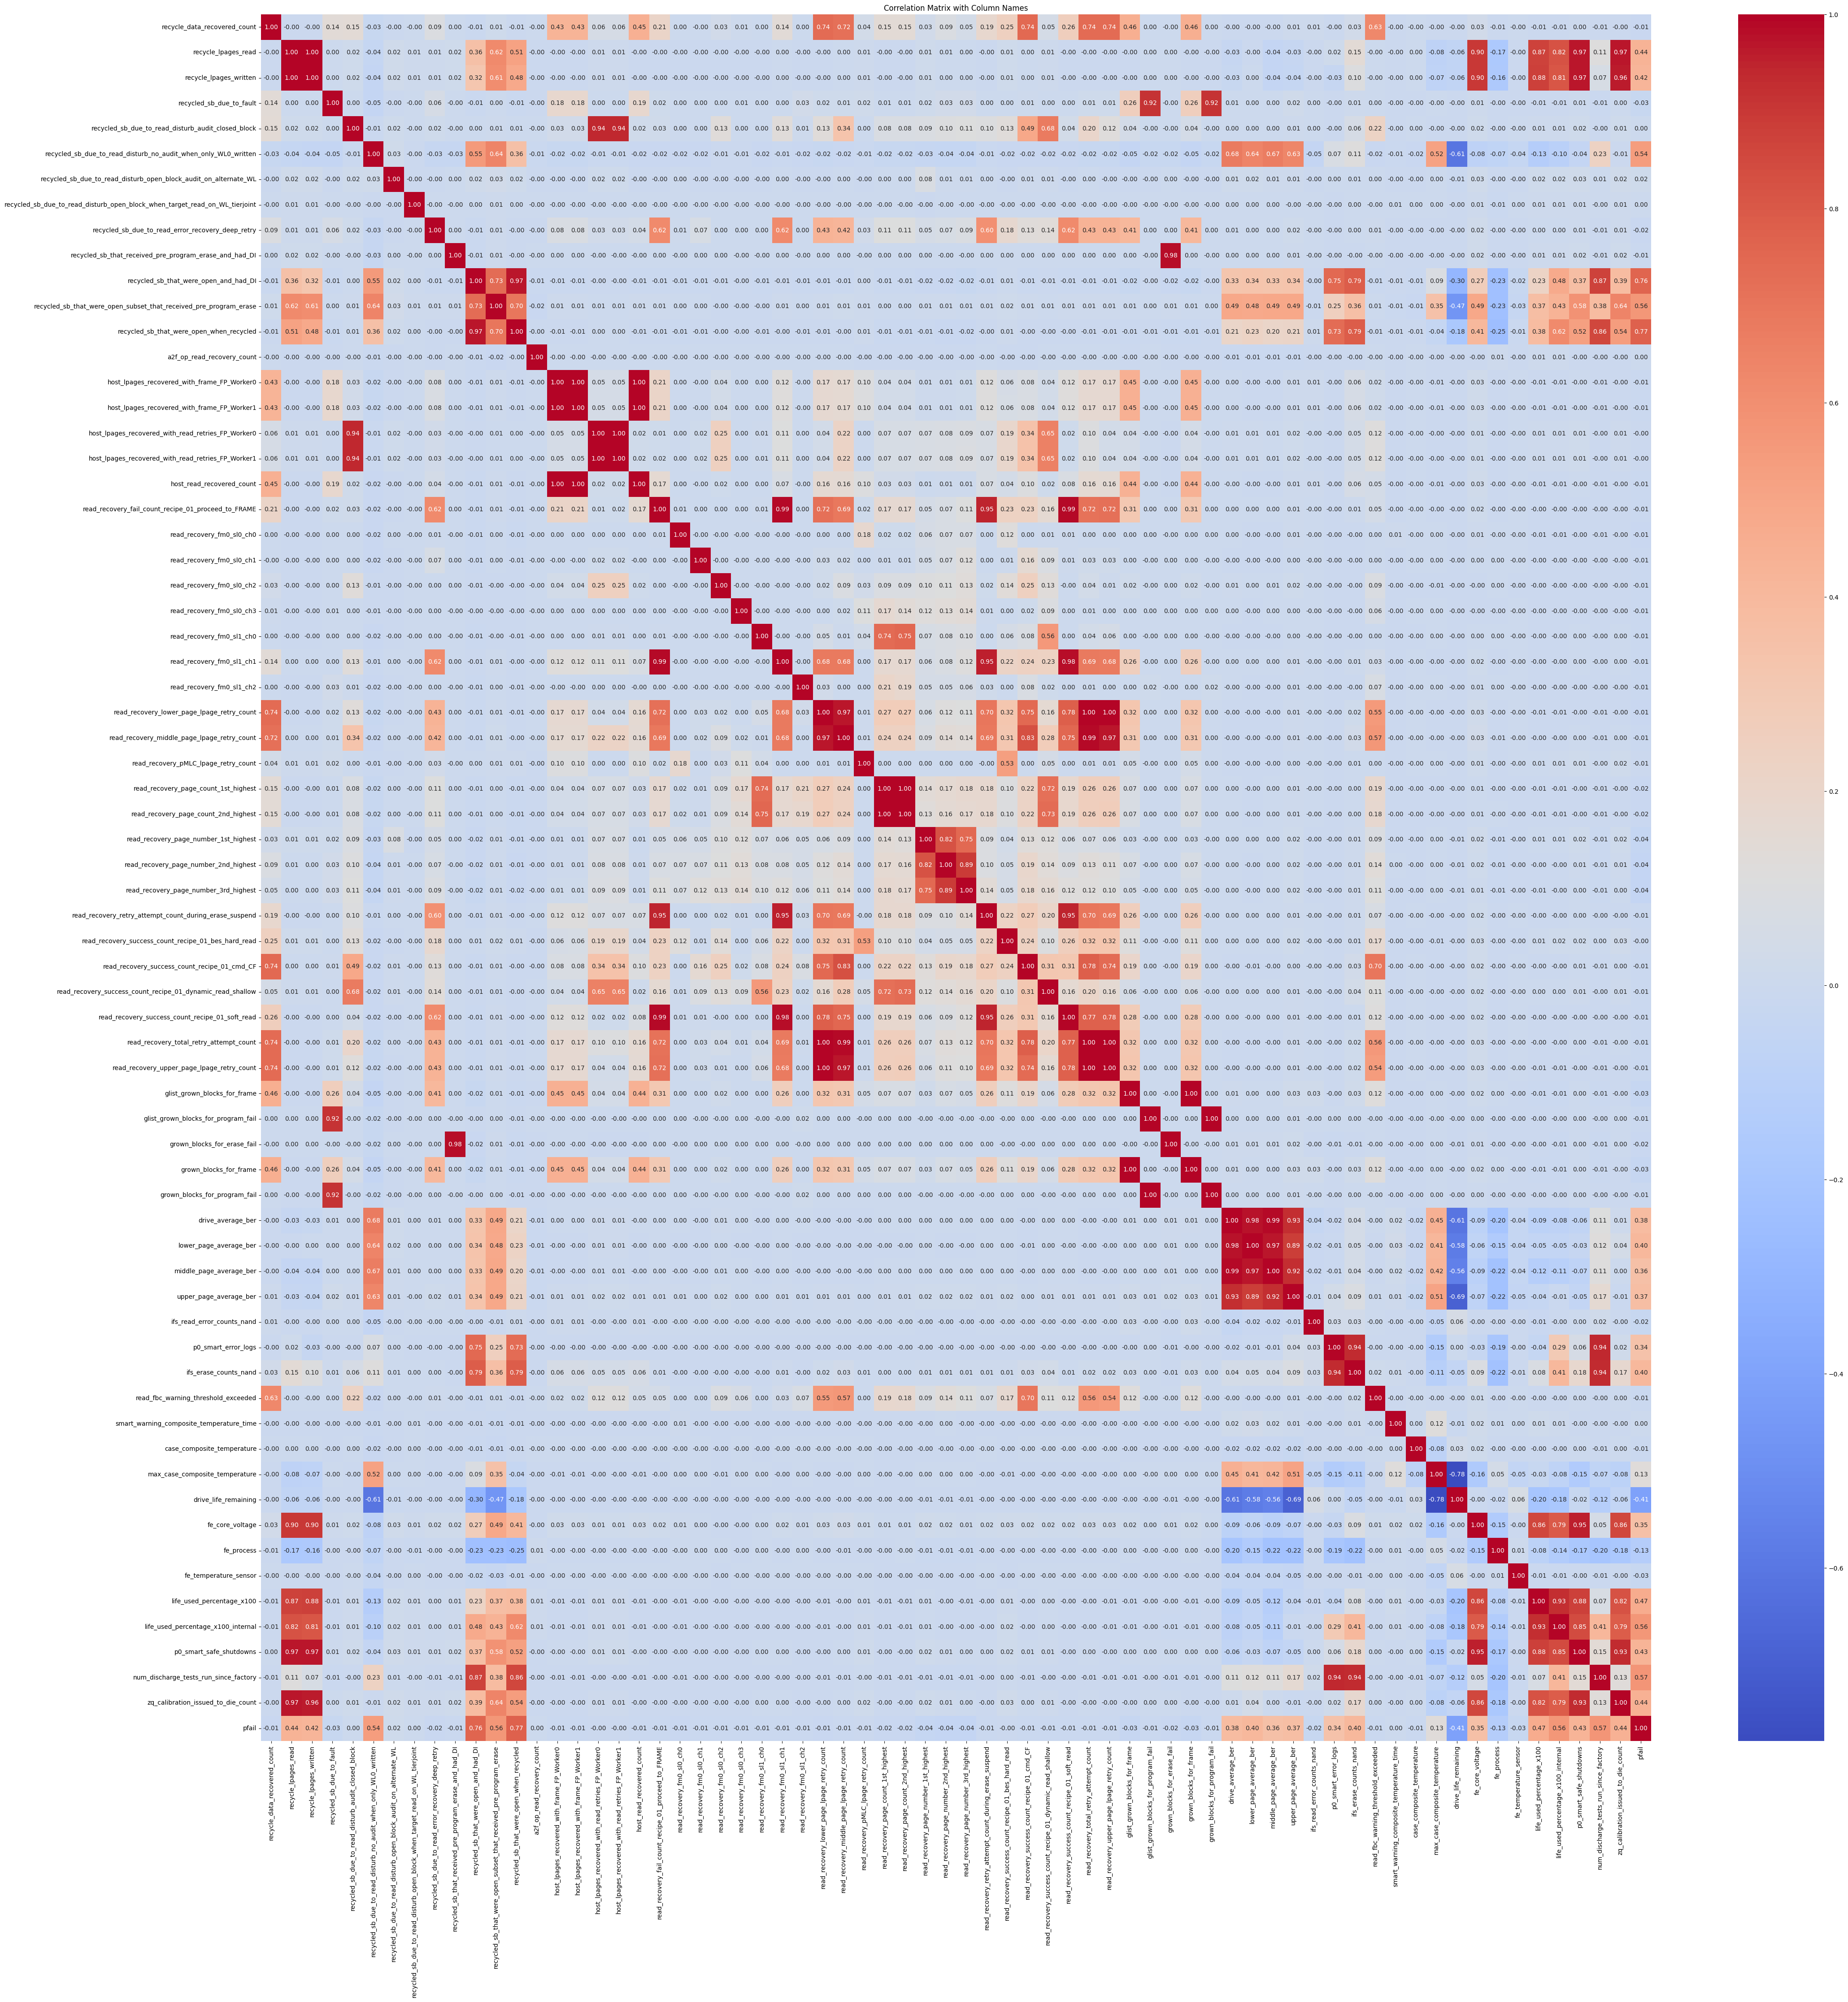

In [64]:
plt.figure(figsize=(50, 50))  
sns.heatmap(f_data_corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=f_data_corr.columns,
            yticklabels=f_data_corr.columns)
plt.title('Correlation Matrix with Column Names')
plt.show()

MinMax Scaler (Normalization)

In [65]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(f_data)
min_max_scaler_data = min_max_scaler.transform(f_data)
min_max_scaler_data.shape

(106501, 68)

USING ISOLATION FOREST ALOGRITHM

In [66]:
iso_forest = IsolationForest(n_estimators=69, contamination=0.03, random_state=45)
iso_forest.fit(min_max_scaler_data)

predictions = iso_forest.predict(min_max_scaler_data)

In [67]:
anomalies = min_max_scaler_data[predictions == -1]
anomalies.shape

(3195, 68)

In [68]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
print(predictions_df)
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso.csv')
df_data_with_max_poh_iso.to_csv(file_path)


        Predictions
0                -1
1                -1
2                 1
3                 1
4                -1
...             ...
106496            1
106497            1
106498            1
106499            1
106500            1

[106501 rows x 1 columns]


USING K_MEANS ALGORITHM

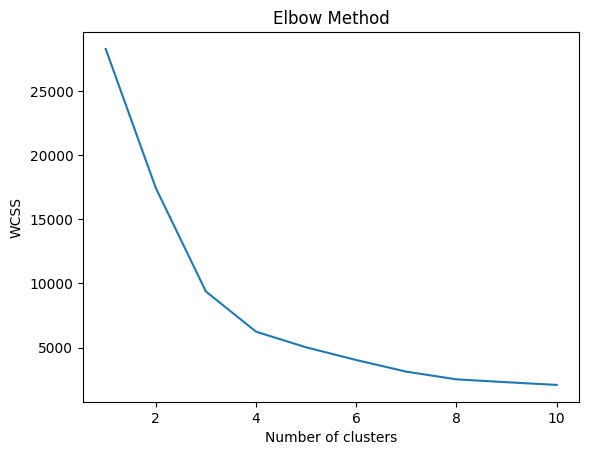

In [69]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(min_max_scaler_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


69159 2764 32402 2176
106501


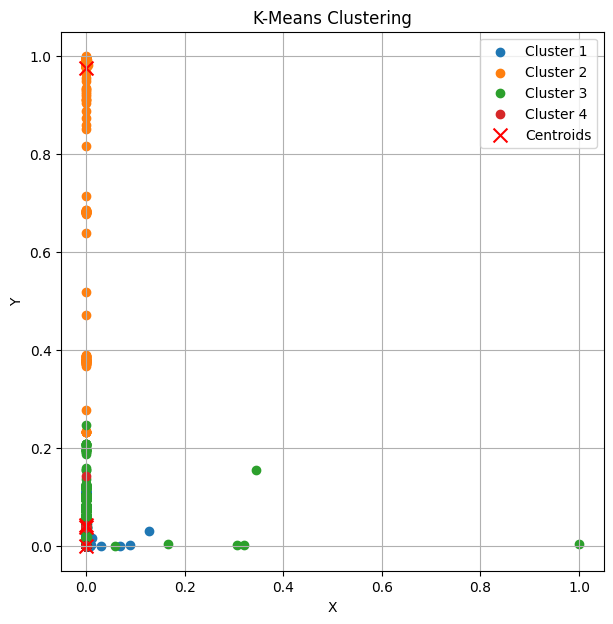

In [70]:

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=9)
kmeans.fit(min_max_scaler_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
kmeans_labeled_data = [(point, label) for point, label in zip(min_max_scaler_data, labels)]
print(len(min_max_scaler_data[labels == 0]),len(min_max_scaler_data[labels == 1]),len(min_max_scaler_data[labels == 2]),len(min_max_scaler_data[labels == 3]))
print(len(labels))
[(point, label) for point, label in zip(min_max_scaler_data, labels)]
plt.figure(figsize=(7, 7))
for i in range(k):
    cluster_points = min_max_scaler_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
df_data_with_max_poh_kmeans = pd.DataFrame(df_data_with_max_poh_iso)
df_data_with_max_poh_kmeans['Clusters'] = 0
for index, row in df_data_with_max_poh_kmeans.iterrows():
    df_data_with_max_poh_kmeans.at[index, 'Clusters'] = labels[index]
file_path = os.path.join(directory, 'df_data_with_max_poh_kmeans.csv')
df_data_with_max_poh_kmeans.to_csv(file_path)

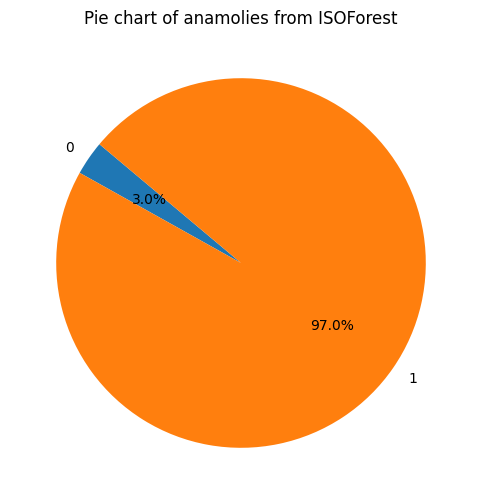

In [72]:
iso_labels = df_data_with_max_poh_kmeans["Predictions"]
iso_labels.replace(-1,0, inplace=True)
iso_label_counts = np.bincount(iso_labels)
plt.figure(figsize=(8, 6))
plt.pie(iso_label_counts, labels=np.unique(iso_labels), autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of anamolies from ISOForest')
plt.show()

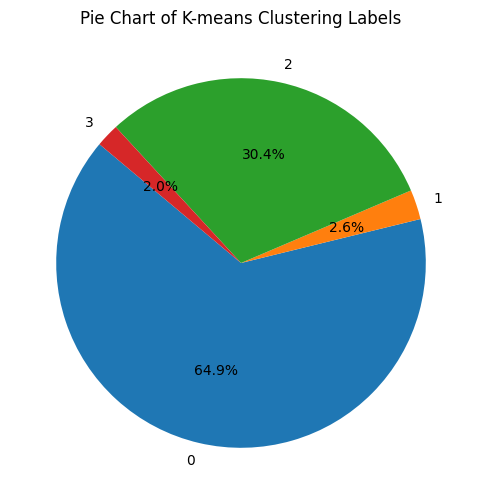

In [73]:
label_counts = np.bincount(labels)
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=np.unique(labels), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of K-means Clustering Labels')
plt.show()

ISOLATION FOREST WITH HYPERPARAMS

In [74]:
iso_forest_1 = IsolationForest(n_estimators=69, contamination=0.03, random_state=45, max_features=1.0, max_samples=1.0)
iso_forest_1.fit_predict(min_max_scaler_data)

predictions_1 = iso_forest_1.predict(min_max_scaler_data)
anomalies = min_max_scaler_data[predictions_1 == -1]
anomalies.shape

predictions_df_1 = pd.DataFrame(predictions_1, columns=['Predictions'])
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['iso_forest_1_Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso_forest_1.csv')
df_data_with_max_poh_iso.to_csv(file_path)

In [75]:
# Data setup
# labels = df_data_with_max_poh_iso['serial_number']
# features_x = df_data_with_max_poh_iso['Predictions']
# features_y = df_data_with_max_poh_iso['iso_forest_1_Predictions']

# x = np.arange(len(labels))  # Label locations
# width = 0.35  # Width of the bars

# fig, ax = plt.subplots(figsize=(10, 6))
# rects1 = ax.bar(x - width/2, features_x, width, label='Feature X')
# rects2 = ax.bar(x + width/2, features_y, width, label='Feature Y')

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Values')
# ax.set_title('Values of Features X and Y for Each Label')
# # ax.set_xticks(x)
# # ax.set_xticklabels(labels)
# # ax.legend()

# # Function to attach a text label above each bar, displaying its height.
# # def autolabel(rects):
# #     """Attach a text label above each bar in *rects*, displaying its height."""
# #     for rect in rects:
# #         height = rect.get_height()
# #         ax.annotate('{}'.format(height),
# #                     xy=(rect.get_x() + rect.get_width() / 2, height),
# #                     xytext=(0, 3),  # 3 points vertical offset
# #                     textcoords="offset points",
# #                     ha='center', va='bottom')

# # autolabel(rects1)
# # autolabel(rects2)

# fig.tight_layout()

# plt.show()


ISOLATION FOREST ALGORITHM WITH HYPERPARAMETER TUNNING # 2

In [76]:
iso_forest_2 = IsolationForest(n_estimators=200, contamination=0.03, random_state=45, max_features=1.0, max_samples=1.0)
iso_forest_2.fit(min_max_scaler_data)

predictions_2 = iso_forest_2.predict(min_max_scaler_data)
anomalies = min_max_scaler_data[predictions_2 == -1]
anomalies.shape

predictions_df_2 = pd.DataFrame(predictions_2, columns=['Predictions'])
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['iso_forest_2_Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso_forest_2.csv')
df_data_with_max_poh_iso.to_csv(file_path)

In [77]:
ee_model = EllipticEnvelope(support_fraction=1., contamination=0.1)
ee_model.fit(min_max_scaler_data)
predictions_ee = ee_model.predict(min_max_scaler_data)
print(predictions_ee)
mahalanobis_distances = ee_model.mahalanobis(min_max_scaler_data)

predictions_ee = pd.DataFrame(predictions_ee, columns=['Predictions'])
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['EllipticEnvelope_Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'EllipticEnvelope_Predictions'] = predictions_ee.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso_forest_1_2_n_ee.csv')
df_data_with_max_poh_iso.to_csv(file_path)

c:\ML_Env\PQR_ORT\venv\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[-1 -1 -1 ...  1  1  1]


Local Outlier Factor ALGORITHM

In [78]:

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=3000, novelty=False)

# Fit the model and predict outliers
lof_y_pred = lof.fit_predict(min_max_scaler_data)

# Find the number of outliers detected
n_outliers = (lof_y_pred == -1).sum()
print(f"Number of outliers detected: {n_outliers}")


predictions_lof = pd.DataFrame(lof_y_pred, columns=['Predictions'])
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['LOF_Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'LOF_Predictions'] = predictions_lof.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'EllipticEnvelope_Predictions'] = predictions_ee.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso_forest_1_2_n_ee_lof.csv')
df_data_with_max_poh_iso.to_csv(file_path)


# plt.scatter(df_data_with_max_poh_iso['serial_number'], df_data_with_max_poh_iso['LOF_Predictions'], color=np.where(lof_y_pred == -1, 'r', 'b'))
# plt.title("Local Outlier Factor (LOF)")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

Number of outliers detected: 10962


ONECLASS SVM ALGORITHM

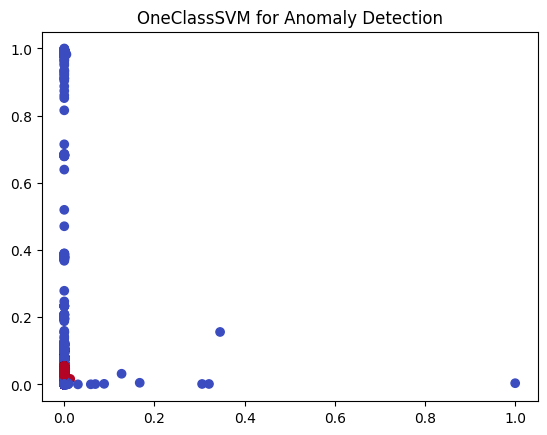

In [79]:

ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

ocsvm.fit(min_max_scaler_data)
pred_oneSVM = ocsvm.predict(min_max_scaler_data)

# Plot the data
plt.scatter(min_max_scaler_data[:, 0], min_max_scaler_data[:, 1], c=pred_oneSVM, cmap='coolwarm')
plt.title("OneClassSVM for Anomaly Detection")
plt.show()



predictions_oneSVM = pd.DataFrame(pred_oneSVM, columns=['Predictions'])
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['LOF_Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'EllipticEnvelope_Predictions'] = predictions_ee.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'LOF_Predictions'] = predictions_lof.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'ONESVM_Predictions'] = predictions_oneSVM.at[index, 'Predictions']

file_path = os.path.join(directory, 'df_data_with_max_poh_iso_forest_1_2_n_ee_lof_onesvm.csv')
df_data_with_max_poh_iso.to_csv(file_path)



In [ ]:
min_max_scaler_data_df = pd.DataFrame(min_max_scaler_data)

# Plotting
for column_name in min_max_scaler_data_df.columns:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(min_max_scaler_data_df.index, min_max_scaler_data_df[column_name])  # Use DataFrame index as x values
    plt.title(f'Scatter plot of {column_name}')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.show()